In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need 
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

# Assignment 1

## Task 1: PDFs and CDFs

#### 1. Look up the t-distribution and plot the histogram of 100 observations from the t-distribution with 1 degree of freedom.

The PDF of the t-distribution with one degree of freedom is given by the formula (with $\Gamma$ is the gamma function)  

$\frac{\Gamma(1)}{\sqrt{\pi}\Gamma(\frac{1}{2})}\frac{1}{(1 + t^2)}$


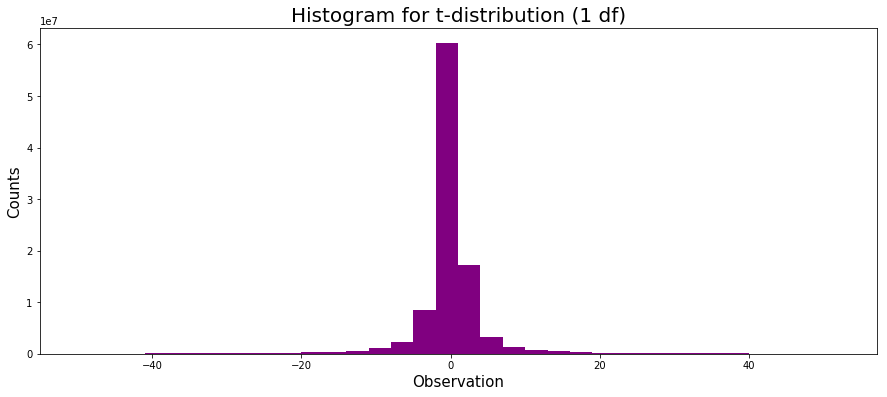

In [2]:
# draw observations from t-distribution
n = 100000000;
df = 1;
X = np.random.standard_t(df,n);

# compute min/max for plotting properties
x_min = np.amin(X);
x_max = np.amax(X);

# raster plot
# !!!! probably there are observations excluded because of range (plotting reasons) -> no plot restrictions?
plt.figure(figsize=(15, 6))
plt.hist(X, bins = np.arange(-50,55, 3), color = 'purple')
plt.xlabel('Observation',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title(r'Histogram for t-distribution (1 df)', fontsize = 20)
plt.show()

#### 2. Compute the mean and variance. Plot the estimated PDF and its corresponding empirical CDF. Report your findings for mean and variance and comment on them, if necessary. Compare your results with those from a standard normal distribution, N (0, 1).

In [3]:
X_mean = np.mean(X);
X_var = np.var(X);

print('Mean: {}, Variance: {}'.format(X_mean, X_var))

Mean: -14.688365316169536, Variance: 17380068464.233875


The mean is, as it should, close to zero. With this small degree of freedom, nothing can be said about the variance. Compared to the standard normal distribution, the mean value is similar, but the variance of the estimated t-distribution is much higher.

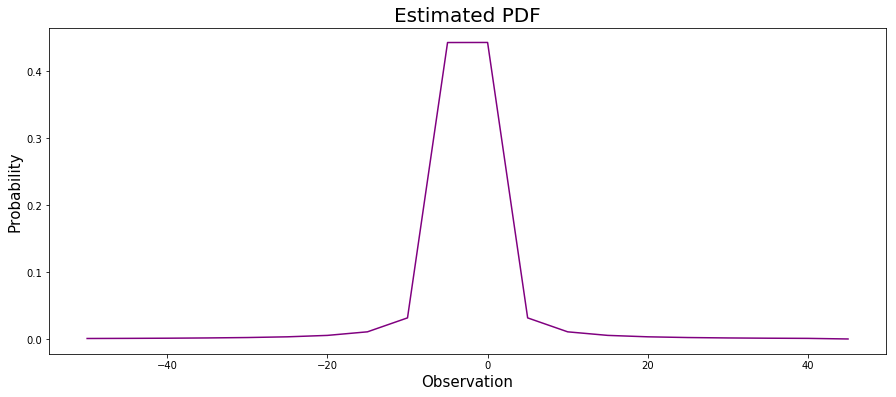

In [4]:
# compute histogram and bin values from observation
X_hist, X_bins = np.histogram(X, bins = np.arange(-50,50, 5));

# normalize the values of the histogram
X_hist_sum = np.sum(X_hist)
X_hist_norm = [z/X_hist_sum for z in X_hist]

# numeric approximation of pdf
plt.figure(figsize=(15, 6))
plt.plot(X_bins, np.append(X_hist_norm,0), color = 'purple')
plt.title('Estimated PDF', fontsize = 20)
plt.xlabel('Observation', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

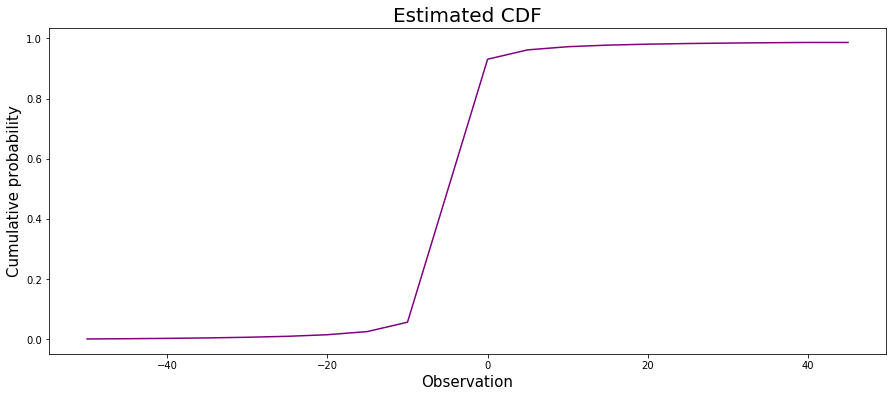

In [5]:
#compute cdf from histogram data
C = np.cumsum(X_hist) / n

# numeric approximation of cdf
plt.figure(figsize=(15, 6))
plt.plot(X_bins, np.append(C,C[-1]), color = 'purple')
plt.title('Estimated CDF', fontsize = 20)
plt.xlabel('Observation', fontsize = 15)
plt.ylabel('Cumulative probability', fontsize = 15)
plt.show()

## Task 2: Maximum likelihood and beyond

## Task 3: Useful statistical concepts

#### Unbiasedness of an estimator

An estimator is unbiased if the expectation of this estimator is equal to the true value that should be estimated.  
With estimator $\hat{y}$ and true value $y$ for an unbiased estimator it holds that $\mathbb{E}(\hat{y}) = y$.

#### Consistency of an estimator

An estimator is consistent if, as the number of data points increases, the probability distribution of the estimator concentrates more and more around the true value that should be estimated.  
  
A consistent but biased estimator is for example the empirical variance. The empirical variance is consistently shifted away from the true value that should be estimated by a specific fraction. But if the data points increases the mean of the estimations get closer and closer to the true value. 

#### Central Limit Theorem

If you have $X_1, ... X_n$ i.i.d. random variables with the same mean $\mu$ and the same variance $\sigma^2$. Then the random variable $Z = \sum_i X_i$ converges to the cdf of the normal distribution. This means for example, if you conduct n-times the same experiment and record the outcomes, then the outcomes are distributed normally.

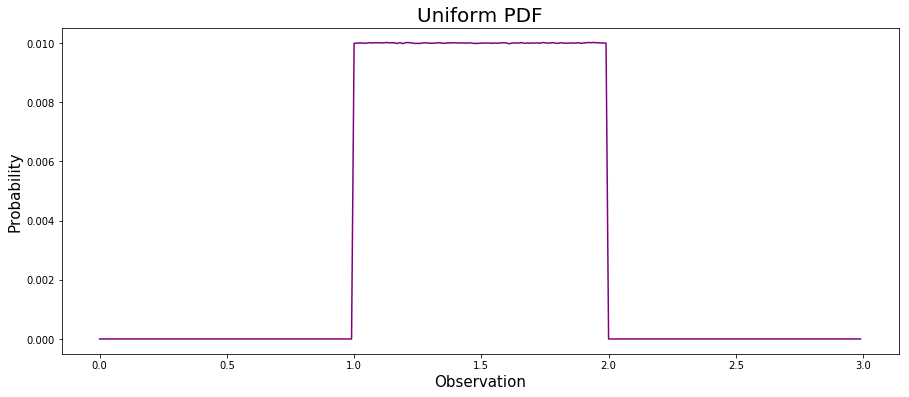

We will choose the plotted uniform distribution to sample from.
We will choose a sample size of 5 for each experiment.


In [6]:
# use the uniforum distribution to illustrate the CLT
# draw observations from t-distribution
n = 100000000;
U = np.random.uniform(1,2,n);

# compute min/max for plotting properties
u_min = np.amin(U);
u_max = np.amax(U);

# compute histogram and bin values from observation
U_hist, U_bins = np.histogram(U, bins = np.arange(0,3, 1e-2));

# normalize the values of the histogram
U_hist_sum = np.sum(U_hist)
U_hist_norm = [z/U_hist_sum for z in U_hist]

# numeric approximation of pdf
plt.figure(figsize=(15, 6))
plt.plot(U_bins, np.append(U_hist_norm,0), color = 'purple')
plt.title('Uniform PDF', fontsize = 20)
plt.xlabel('Observation', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

print('We will choose the plotted uniform distribution to sample from.')
print('We will choose a sample size of 5 for each experiment.')


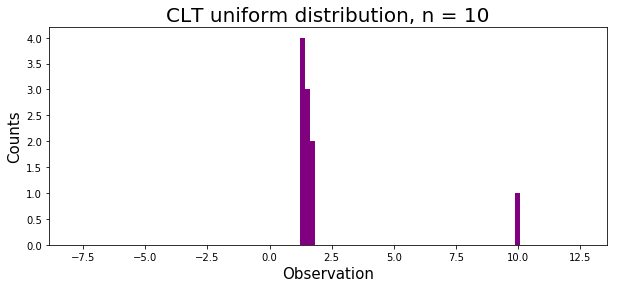

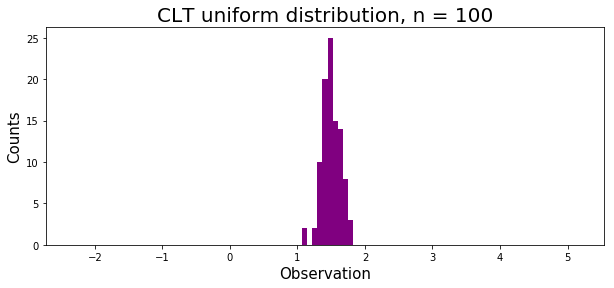

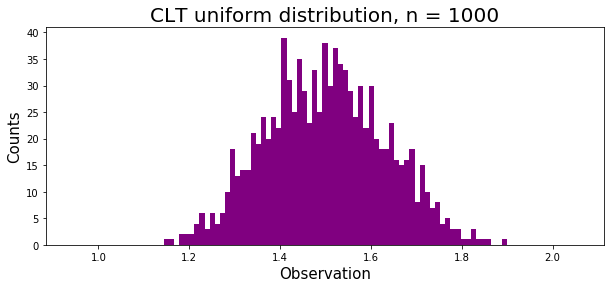

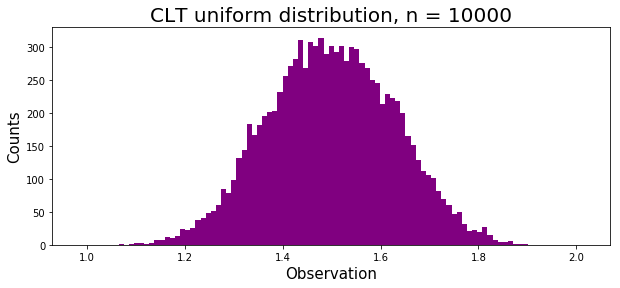

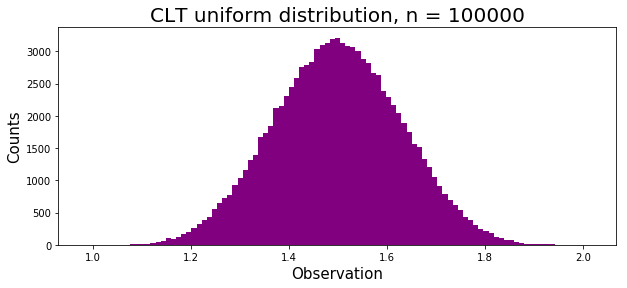

Obviously, the central limit theorem depends on the number of experiments.
For an increasing n, the distribution of the means of the experiment approaches a normal distributio_mn.
For 100 000 experiments, the distribution looks almost perfectly like a normal distribution.
In this case, the mean is 1.4991548329993718 and the standard deviation 0.12946480932106957.


In [8]:
# different numbers of observation to see the progress of CLT
Ns = [10, 100, 1000, 10000, 100000];

# compute and plot pmfs for different lambdas
for j in Ns:    
    means = np.empty(j)

    for i in range (1,j):
        sample_size = 5;
        sample = np.random.uniform(1,2,sample_size);
        means[i] = np.mean(sample);

    # computations for plotting
    m_mean = np.mean(means);
    m_std = np.std(means);
    
    # central limit theorem illustration
    plt.figure(figsize=(10, 4))
    plt.hist(means, bins = np.linspace(m_mean - 4 * m_std,m_mean + 4 * m_std,100), color = 'purple')
    plt.xlabel('Observation',fontsize=15)
    plt.ylabel('Counts',fontsize=15)
    plt.title(r'CLT uniform distribution, n = {}'.format(j), fontsize = 20)
    plt.show()
    
print('Obviously, the central limit theorem depends on the number of experiments.')
print('For an increasing n, the distribution of the means of the experiment approaches a normal distributio_mn.')
print('For 100 000 experiments, the distribution looks almost perfectly like a normal distribution.')
print('In this case, the mean is {} and the standard deviation {}.'.format(m_mean, m_std))


## Task 4: T-tests applied to data

## Task 5: Information theory

#### Entropy

To explain the term entropy, I will first define Shannon information.  
Shannon information is the reduction of uncertainty that is obtained if a specific outcome x is observed.  
  
The Shannon entropy is then the average Shannon information that is obtained when observing the outcomes from a random variable. It is defined as 
$H(X) = - \sum_{x \in \mathbb{A}_X} p(x) log(p(x))$


#### the KL-Divergence

The KL-divergence $D_{KL}(P||Q) = - \sum_{x \in X} P(X) log(\frac{Q(X)}{P(X)})$ is a comparison measure. In the framework of information theory, the KL-divergence describes the inefficiency in using the probability distribution Q to approximate the true probability distribution.

#### the Jenson-Shannon Divergence

The Jenson-Shannon Divergence $I_{JS}(P||Q) = \frac{1}{2} D_{KL}(P||M) + \frac{1}{2} D_{KL}(Q||M)$ with $M = \frac{1}{2} (P + Q)$ describes the same relationship but this measure is symmetrized, so it has advantageous mathematical properties.

#### Neurometric function analysis of population codes

paper: Berens, P., Gerwinn, S., Ecker, A., & Bethge, M. (2009). Neurometric function analysis of population codes. In Advances in neural information processing systems (pp. 90-98)

In this paper, Berens et al. analyses the neurometric function of population codes. Given the context, that two stimuli $\theta$ and $\theta + \Delta \theta$ should be discriminated, the neurometric function describes the error $\epsilon$ depending on $\Delta \theta$. Amongst other relationships, they showed that this error has a lower bound and it can be described with help of the entropy and the Jenson-Shannon-Divergence: $\epsilon(\Delta \theta) \geq H^{-1} (1 - I_{JS}(\Delta \theta))$. 